### Background & Context

Employee Promotion means the ascension of an employee to higher ranks, this aspect of the job is what drives employees the most.
The ultimate reward for dedication and loyalty towards an organization and HR team plays animportant role in handling all these promotion tasks based on ratings and other attributes available.

The HR team in JMDcompany stored data of promotion cycle last year, which consists of details of all the employees in the company working last year and also
if they got promoted or not, but every time this process gets delayed due to so many details available for each employee - it gets difficult to compare and decide.

So this time HR team wants to utilize the stored data to make a model, that will predict if a person is eligible for promotion or not.

You as a data scientist at JMDcompany, need to come up with a model that will help the HR team to predict if a person is eligible for promotion or not.

### Objective

Explore and visualize the dataset.
Build a classification model to predict if the customer has a higher probability of getting a promotion
Optimize the model using appropriate techniques
Generate a set of insights and recommendations that will help the company

### Data Dictionary:

* employee_id: Unique ID for the employee
* department: Department of employee
* region: Region of employment (unordered)
* education: Education Level
* gender: Gender of Employee
* recruitment_channel: Channel of recruitment for employee
* no_ of_ trainings: no of other trainings completed in the previous year on soft skills, technical skills, etc.
* age: Age of Employee
* previous_ year_ rating: Employee Rating for the previous year
* length_ of_ service: Length of service in years
* awards_ won: if awards won during the previous year then 1 else 0
* avg_ training_ score: Average score in current training evaluations
* is_promoted: (Target) Recommended for promotion

Exploratory Data Analysis and Insights
- Problem definition, questions to be answered - Data background and contents - Univariate analysis - Bivariate analysis - Key meaningful observations on individual variables and the relationship between variables	8

Data pre-processing
- Prepare the data for analysis - Feature Engineering - Missing value Treatment - Outlier Treatment Note: Please ensure no data leakage occurs among train-test and validation sets	6

Model building
- Choose the metric of interest - Build 6 models (from logistic regression, decision trees, bagging and boosting methods) - You can choose not to build XGBoost if you are facing issues with the installation	5

Model building - Oversampled data
- Build 6 models using oversampled data (from logistic regression, decision trees, bagging and boosting methods) - You can choose not to build XGBoost if you are facing issues with installation	6

Model building - Undersampled data
- Build 6 models using undersampled data(from logistic regression, decision trees, bagging and boosting methods) - You can choose not to build XGBoost if you are facing issues with installation	6

Hyperparameter tuning using random search
- Choose 3 best models to be tuned and provide the reason for the same - Tune the best 3 models obtained above using randomized search and metric of interest - Check the performance of 3 tuned models	7

Model Performances
- Compare the performance of tuned models - Choose the best model - Metric on interest on the test set is expected to be > 0.70	6

Productionize the model
- Create a final model using pipelines	3

Actionable Insights & Recommendations
- Business recommendations and insights	4

Notebook - Overall quality
- Structure and flow - Well commented code

In [1]:
# import required python packages
import numpy as np
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

### Data Wrangling

This step focuses on collecting data, organizing data and make sure it's well defined for the problem. Some data cleaning can be done at this stage, it's important to not over do things before explore the data to understand further.

In [2]:
# loading the dataset
file_path = "data/employeepromotion_raw.csv"

In [3]:
# Load employee data into pandas dataframe
emp_df = pd.read_csv(file_path)

In [4]:
# info method to see a summary of the data
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


**is_promoted** is target variable, other columns are potential features

In [5]:
# Head method to print first few rows of the data
emp_df.head()

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  awards_won  avg_training_score  is_promoted  
0                  8           0                49.0            0  
1                  4           0                60.0            0  
2                  7           0                50.0            0  
3                 10           0                50.0            0  
4                  2           0                73.0            0

In [6]:
# Shape of the data frame
emp_df.shape

(54808, 13)

The data set contains 54808 observations and 13 features. 12 features and 1 target variable

In [7]:
# Print all the columns in the dataframe
emp_df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [8]:
# tail method to print last few rows of the dataframe
emp_df.tail()

employee_id         department     region         education gender  \
54803         3030         Technology  region_14        Bachelor's      m   
54804        74592         Operations  region_27  Master's & above      f   
54805        13918          Analytics   region_1        Bachelor's      m   
54806        13614  Sales & Marketing   region_9               NaN      m   
54807        51526                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
54803            sourcing                1   48                   3.0   
54804               other                1   37                   2.0   
54805               other                1   27                   5.0   
54806            sourcing                1   29                   1.0   
54807               other                1   27                   1.0   

       length_of_service  awards_won  avg_training_score  is_promoted  
54803                 17           0                78.0            0  
54804                  6           0                56.0            0  
54805                  3           0                79.0            0  
54806                  2           0                 NaN            0  
54807                  5           0                49.0            0

#### Missing values

Count the number of missiong values in each column and sort them

In [9]:
# Calculate sum of mission value in the dataframe and find the presentage of the missing data
missing = pd.concat([emp_df.isnull().sum(), 100 * emp_df.isnull().mean()], axis=1)
missing.columns = ["count", "%"]
missing.sort_values(by="%", ascending=False, inplace=True)

In [10]:
missing

count         %
previous_year_rating   4124  7.524449
avg_training_score     2560  4.670851
education              2409  4.395344
employee_id               0  0.000000
department                0  0.000000
region                    0  0.000000
gender                    0  0.000000
recruitment_channel       0  0.000000
no_of_trainings           0  0.000000
age                       0  0.000000
length_of_service         0  0.000000
awards_won                0  0.000000
is_promoted               0  0.000000

Only three column contains missiong value, over 7% of the employee don't have previous year rating. little over 4% employee data doesn't contain training score and education.

#### Categorical Features

In [11]:
# check the categorical features
emp_df.select_dtypes('object')

department     region         education gender  \
0      Sales & Marketing   region_7  Master's & above      f   
1             Operations  region_22        Bachelor's      m   
2      Sales & Marketing  region_19        Bachelor's      m   
3      Sales & Marketing  region_23        Bachelor's      m   
4             Technology  region_26        Bachelor's      m   
...                  ...        ...               ...    ...   
54803         Technology  region_14        Bachelor's      m   
54804         Operations  region_27  Master's & above      f   
54805          Analytics   region_1        Bachelor's      m   
54806  Sales & Marketing   region_9               NaN      m   
54807                 HR  region_22        Bachelor's      m   

      recruitment_channel  
0                sourcing  
1                   other  
2                sourcing  
3                   other  
4                   other  
...                   ...  
54803            sourcing  
54804               other  
54805               other  
54806            sourcing  
54807               other  

[54808 rows x 5 columns]

The above 5 columns in the employee dataframe are categorical values. (Department, Region, education, gender, recuruitment_channel). 

In [12]:
# Values in departments
emp_df["department"].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [13]:
# Value in region
emp_df["region"].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

In [14]:
# Values in education
emp_df["education"].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [15]:
# Values in gender
emp_df["gender"].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

In [16]:
# Values in recuirtment_channel
emp_df["recruitment_channel"].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

In [17]:
emp_df.describe(include = 'object')

department    region   education gender recruitment_channel
count               54808     54808       52399  54808               54808
unique                  9        34           3      2                   3
top     Sales & Marketing  region_2  Bachelor's      m               other
freq                16840     12343       36669  38496               30446

#### Numerical features

Numerical columns we can check stats such as max, min, mean, count, standared deviation, 25,50,75 Percentile. 

In [18]:
# lets check descriptive statistics for numerical columns
emp_df.describe()

employee_id  no_of_trainings           age  previous_year_rating  \
count  54808.000000     54808.000000  54808.000000          50684.000000   
mean   39195.830627         1.253011     34.803915              3.329256   
std    22586.581449         0.609264      7.660169              1.259993   
min        1.000000         1.000000     20.000000              1.000000   
25%    19669.750000         1.000000     29.000000              3.000000   
50%    39225.500000         1.000000     33.000000              3.000000   
75%    58730.500000         1.000000     39.000000              4.000000   
max    78298.000000        10.000000     60.000000              5.000000   

       length_of_service    awards_won  avg_training_score   is_promoted  
count       54808.000000  54808.000000        52248.000000  54808.000000  
mean            5.865512      0.023172           63.712238      0.085170  
std             4.265094      0.150450           13.521910      0.279137  
min             1.000000      0.000000           39.000000      0.000000  
25%             3.000000      0.000000           51.000000      0.000000  
50%             5.000000      0.000000           60.000000      0.000000  
75%             7.000000      0.000000           77.000000      0.000000  
max            37.000000      1.000000           99.000000      1.000000

Employee age varies from 20 to 60. 

In [19]:
sns.set(rc={"figure.figsize":(12, 10)})

<AxesSubplot:xlabel='is_promoted', ylabel='count'>

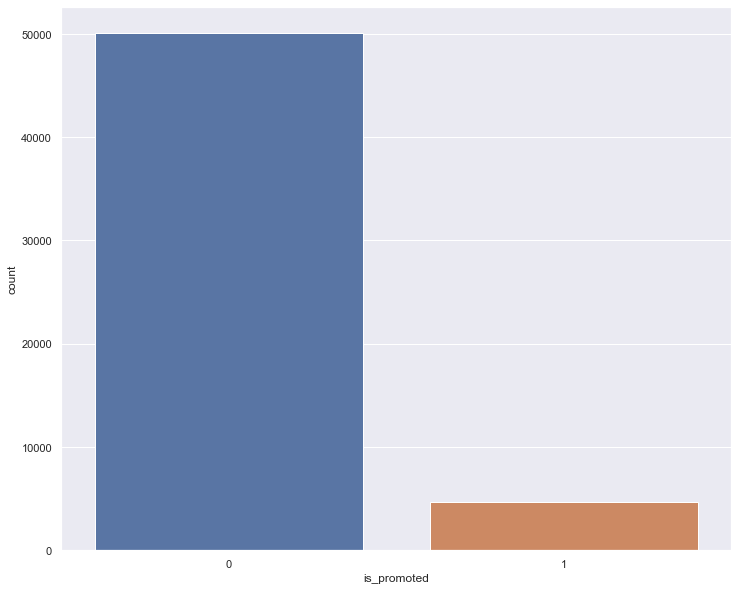

In [20]:
# Check target variable class balance
sns.countplot(data=emp_df,x="is_promoted")

We can conculde from above plot the target class is highly imbalanced.  We must balance the target class otherwise ML model gives very poor results and completly biased towards the class having higher distribution.

In [21]:
# Missiong value 
missing

count         %
previous_year_rating   4124  7.524449
avg_training_score     2560  4.670851
education              2409  4.395344
employee_id               0  0.000000
department                0  0.000000
region                    0  0.000000
gender                    0  0.000000
recruitment_channel       0  0.000000
no_of_trainings           0  0.000000
age                       0  0.000000
length_of_service         0  0.000000
awards_won                0  0.000000
is_promoted               0  0.000000

Only 2,3 columns having missiong valueso no need to delete any rows, we can impute the values using mean, median and mode values

In [22]:
# impute missing values in DF

emp_df["education"] = emp_df["education"].fillna(emp_df["education"].mode()[0])
emp_df["previous_year_rating"] = emp_df["previous_year_rating"].fillna(emp_df["previous_year_rating"].mode()[0])
emp_df["avg_training_score"] = emp_df["avg_training_score"].fillna(emp_df["avg_training_score"].mode()[0])

In [23]:
emp_df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64

now we don't have any mission values in the dataframe

### Exploratory Data Analysis

At this point we have some idea about the data science problem we are trying to solve. There are some rows contains missing value which has been immuted using mode. 

#### Univariate analysis

This step helps to understand the variables present in the dataframe one by one. 
First we can analyze the numberical column using box plot, distribution plots. 

after that we can check categorical columns using piechatrs and count plots, when there is very few categories we can use pie chart. in the place where more categories we can use count plot

The key thing in univariate analysis is that only one variable involved

Box plot helps to analyze the middle 50 percentile of the data. With that we can able to clearly view min, max, median and outlier values.

<AxesSubplot:xlabel='avg_training_score'>

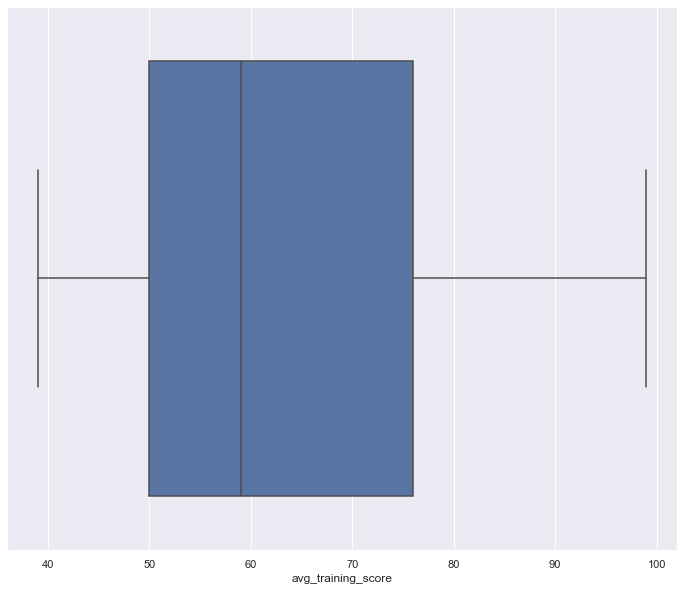

In [24]:
# Average training score
sns.boxplot(x=emp_df["avg_training_score"], data=emp_df)

middle line represent medain of avg_traing score, othe two lines near the median represent 25th and 50th percentile. end of whisker reprsent min and max value of the avg_traing_score. from above plot we can clearly visualize all data points are inside boxplot.

<AxesSubplot:xlabel='age'>

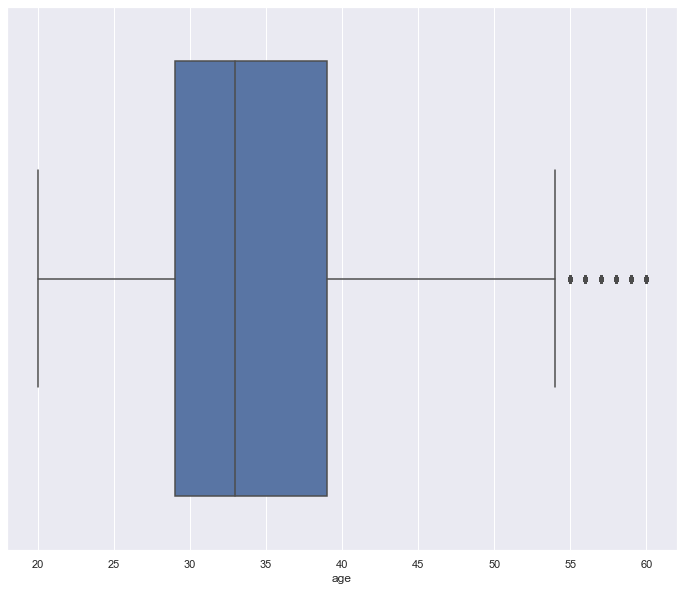

In [25]:
# Age training score
sns.boxplot(x=emp_df["age"], data=emp_df)

Age column contains some outliers, min value = 20, median=33, 75th percentile = 39, max value=around 54. some values ploted beyond max value we can consider those values as outliers.

<AxesSubplot:xlabel='previous_year_rating'>

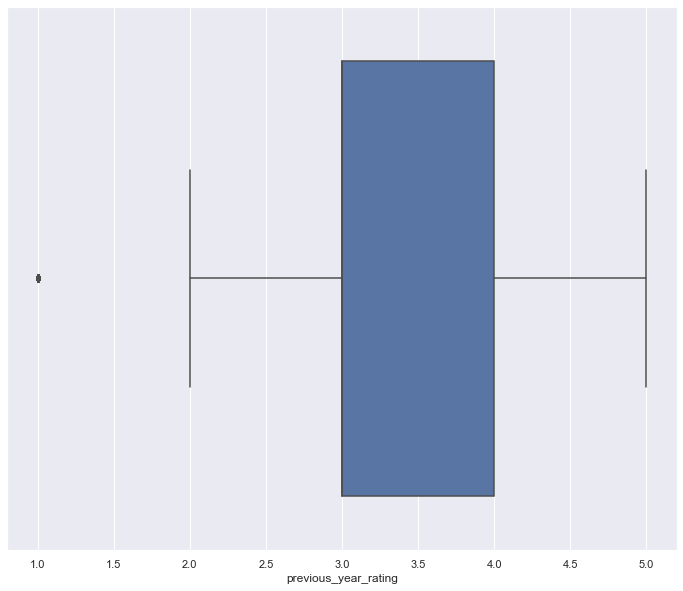

In [26]:
sns.boxplot(x=emp_df["previous_year_rating"], data=emp_df)

<AxesSubplot:xlabel='length_of_service'>

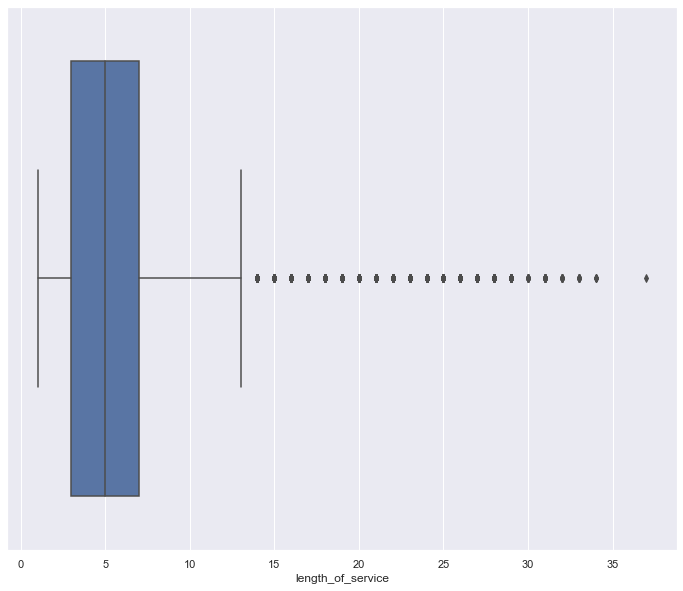

In [27]:
sns.boxplot(x=emp_df["length_of_service"], data=emp_df)

In [28]:
emp_df["length_of_service"].value_counts()

3     7033
4     6836
2     6684
5     5832
7     5551
6     4734
1     4547
8     2883
9     2629
10    2193
11     916
12     794
13     687
15     593
14     549
16     548
17     432
18     392
19     329
20     128
21      78
24      70
23      65
22      61
25      51
26      41
27      36
28      30
29      30
31      20
30      12
32      10
33       9
34       4
37       1
Name: length_of_service, dtype: int64

In length of service feature, we can see many points after the max value, which can be termed as outliers. 

<AxesSubplot:xlabel='no_of_trainings', ylabel='count'>

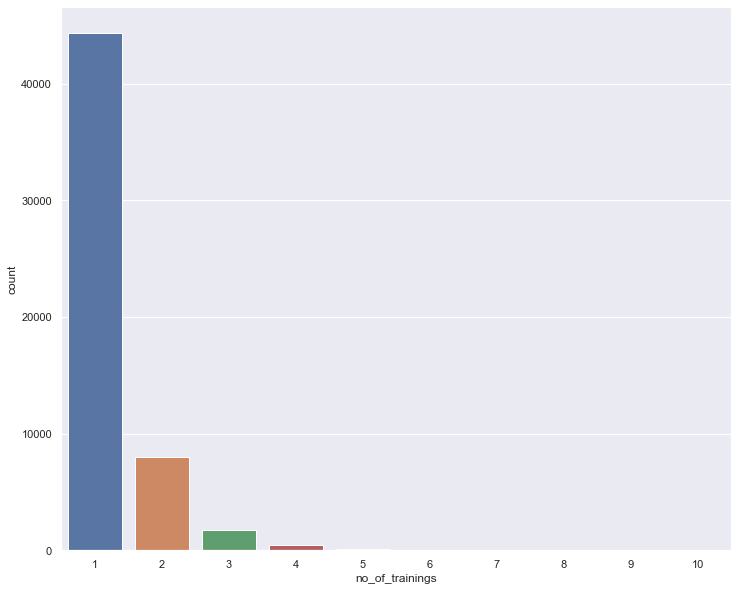

In [29]:
sns.countplot(x=emp_df['no_of_trainings'], data=emp_df)

In [30]:
emp_df["no_of_trainings"].value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
8         5
10        5
9         5
Name: no_of_trainings, dtype: int64

44378 employess done only one training. 

<AxesSubplot:xlabel='age', ylabel='count'>

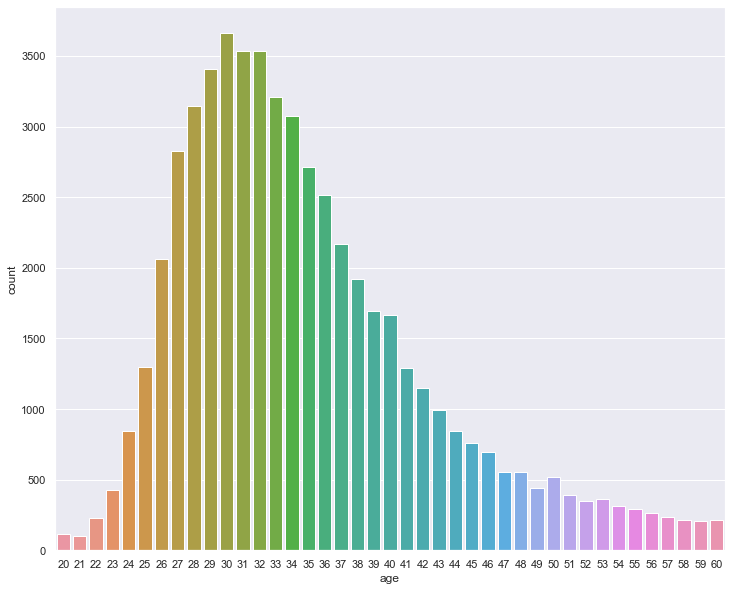

In [31]:
sns.countplot(x=emp_df['age'], data=emp_df)

Majority of employe age distribution from 25-41

<AxesSubplot:xlabel='department', ylabel='count'>

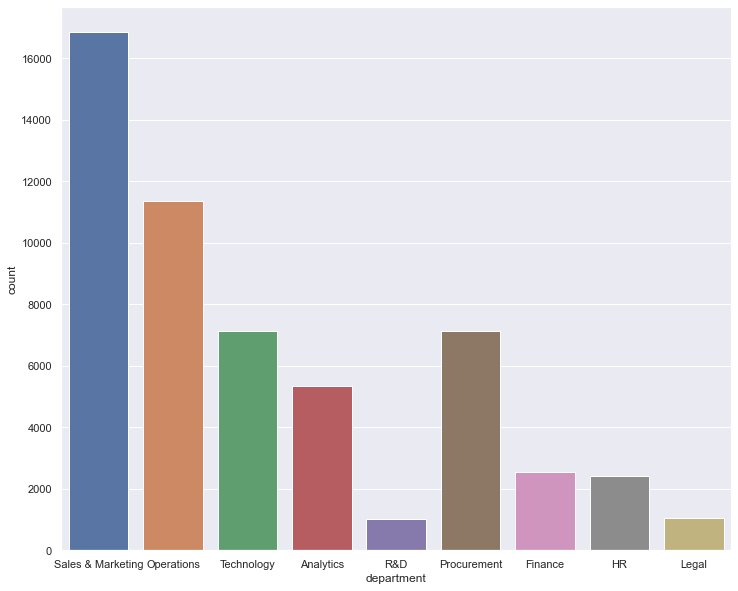

In [32]:
sns.countplot(x=emp_df['department'], data=emp_df)

Sales & Marketing department contains more employee than any other department

<AxesSubplot:xlabel='count', ylabel='region'>

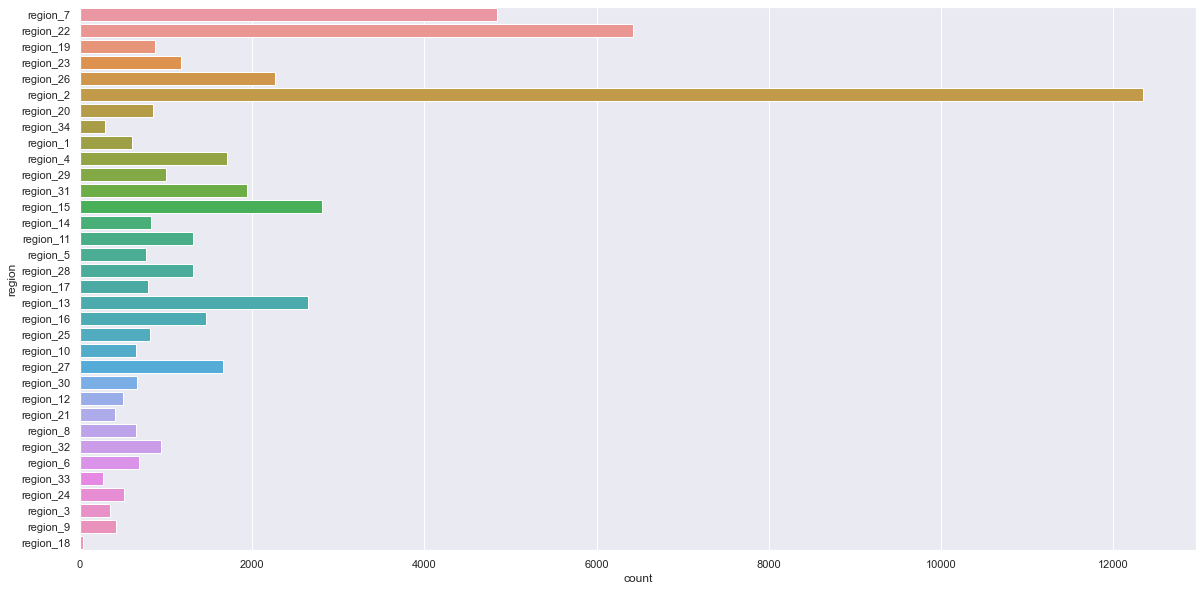

In [33]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.countplot(y=emp_df['region'], data=emp_df, orient="V")

Each region contains different amount of observation.

<AxesSubplot:xlabel='gender', ylabel='count'>

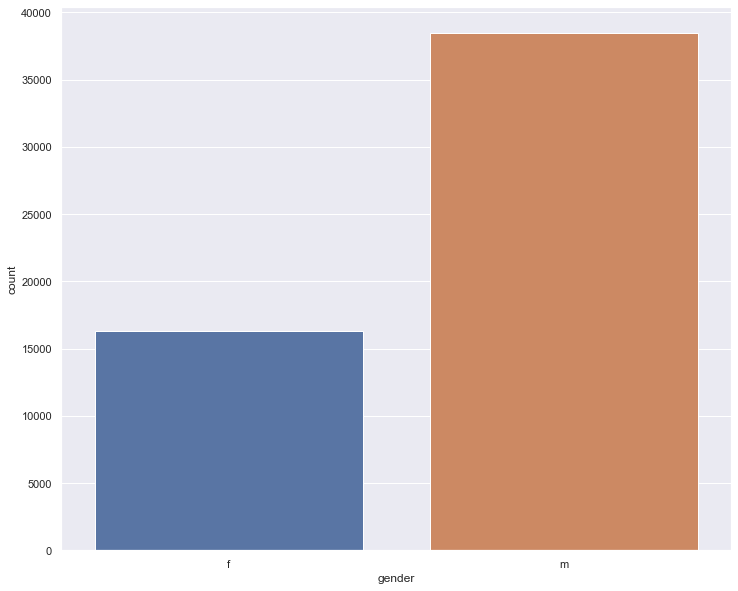

In [34]:
sns.set(rc={"figure.figsize":(12, 10)})
sns.countplot(x=emp_df['gender'], data=emp_df)

Male employees are more than female employees

<AxesSubplot:xlabel='education', ylabel='count'>

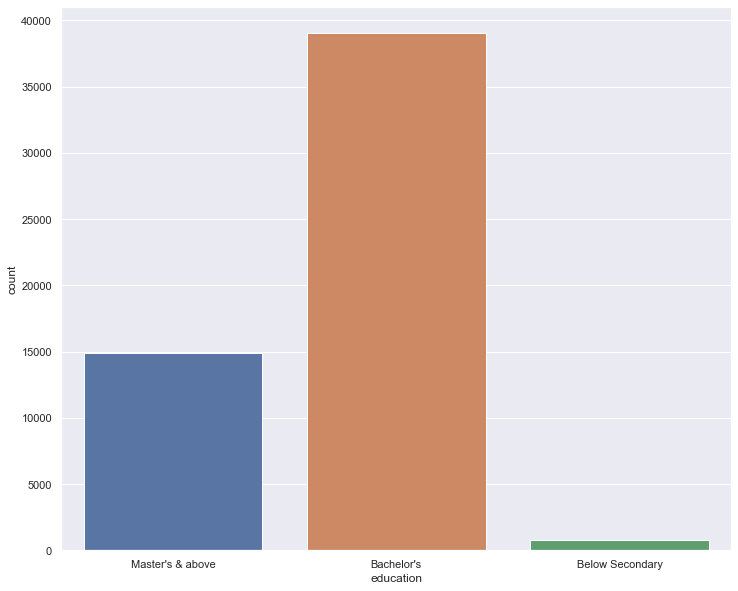

In [35]:
sns.countplot(x=emp_df['education'], data=emp_df)

Morethan 35K employees completed bachelor's education. ( We immute the missing value using mode)

<AxesSubplot:xlabel='recruitment_channel', ylabel='count'>

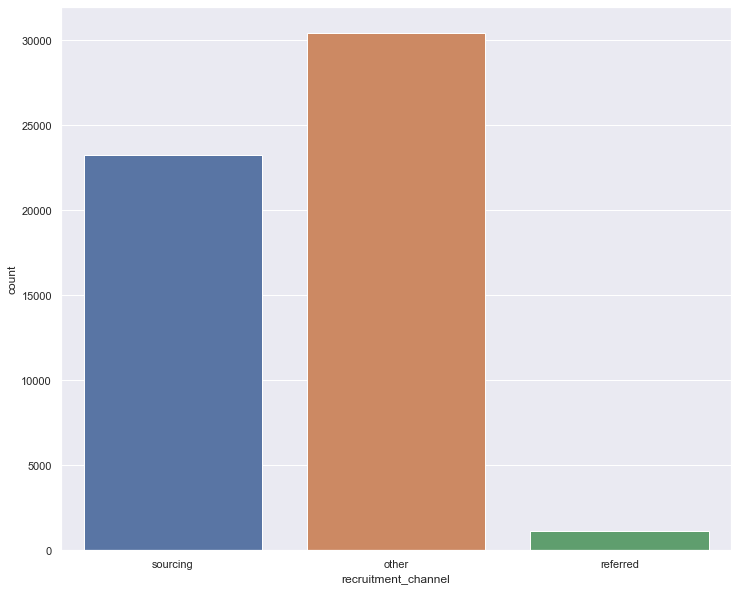

In [36]:
sns.countplot(x=emp_df['recruitment_channel'], data=emp_df)

<AxesSubplot:xlabel='awards_won', ylabel='count'>

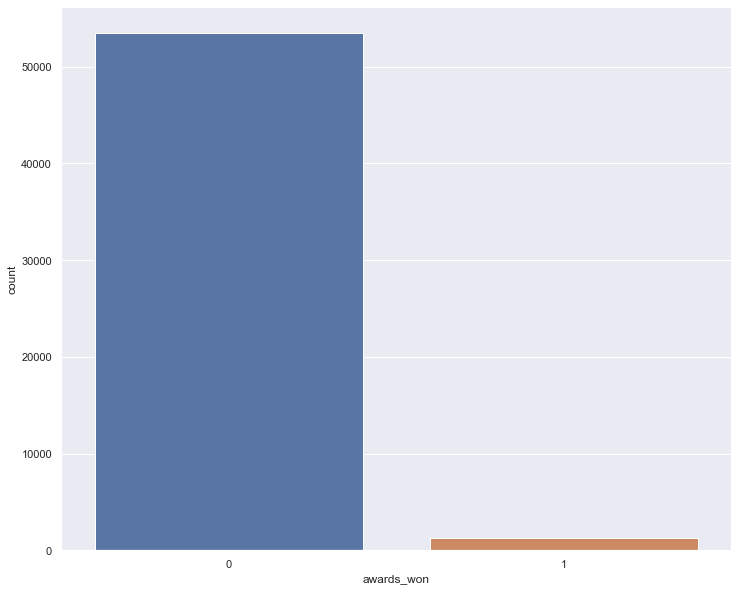

In [37]:
sns.countplot(x=emp_df['awards_won'], data=emp_df)

only countable no of employees won the award. 

<AxesSubplot:xlabel='is_promoted', ylabel='count'>

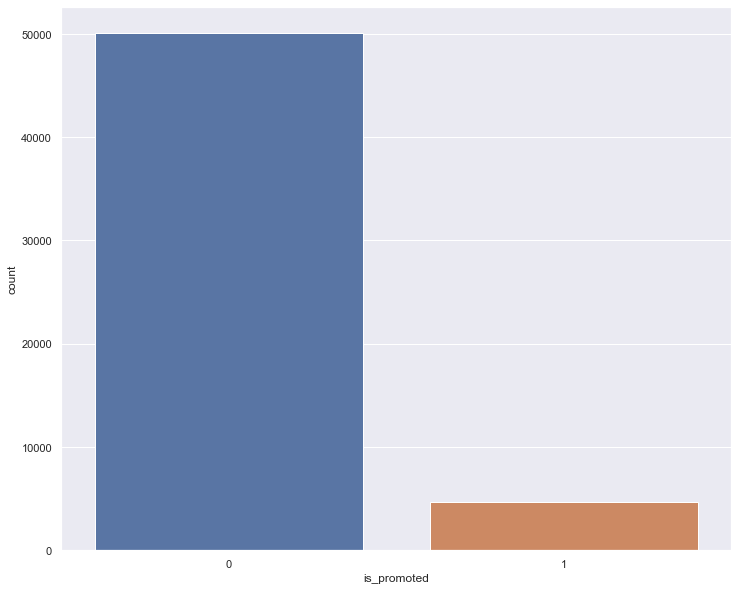

In [38]:
sns.countplot(x=emp_df['is_promoted'], data=emp_df)

#### BiVariate Analysis

It's a quantitiative analyis. This involves the analysis of two variables for the purpose of determining the empirical relationship between them. bivarate analyis can be helpful in testing simple hypotheses association.

* Categorical vs categorical
* Categorical vs Numerical
* Numerical vs Numverical

In [39]:
# Gender and is_promoted

pd.crosstab(emp_df["gender"], emp_df["is_promoted"])

is_promoted      0     1
gender                  
f            14845  1467
m            35295  3201

Almost 10% of people get promoted on both gender

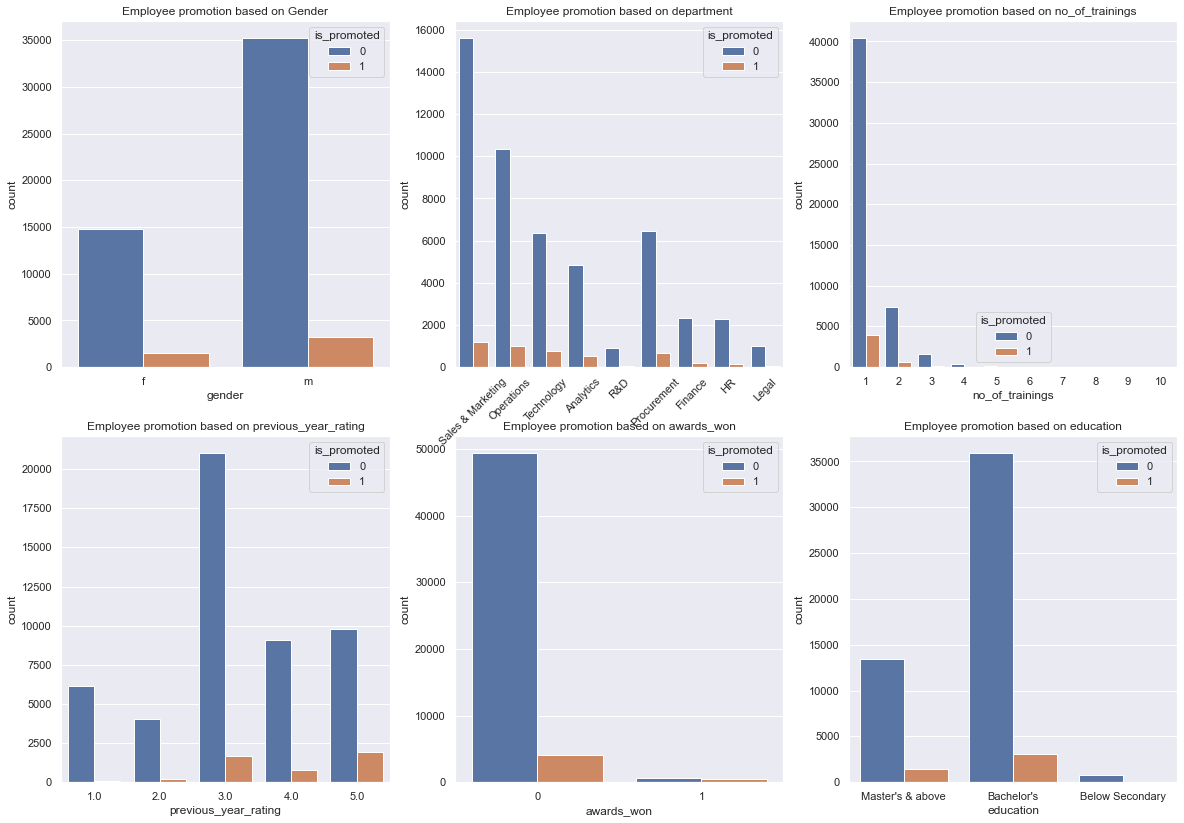

In [40]:
plt.figure(figsize=(20,14))
plt.subplot(231)
sns.countplot(x=emp_df['gender'],hue=emp_df['is_promoted'])
plt.title('Employee promotion based on Gender')
plt.subplot(232)
plt.xticks(rotation=45)
sns.countplot(x=emp_df['department'],hue=emp_df['is_promoted'])
plt.title('Employee promotion based on department')
plt.subplot(233)
sns.countplot(x=emp_df['no_of_trainings'],hue=emp_df['is_promoted'])
plt.title('Employee promotion based on no_of_trainings')
plt.subplot(234)
sns.countplot(x=emp_df['previous_year_rating'],hue=emp_df['is_promoted'])
plt.title('Employee promotion based on previous_year_rating')
plt.subplot(235)
sns.countplot(x=emp_df['awards_won'],hue=emp_df['is_promoted'])
plt.title('Employee promotion based on awards_won')
plt.subplot(236)
sns.countplot(x=emp_df['education'],hue=emp_df['is_promoted'])
plt.title('Employee promotion based on education')
plt.show()

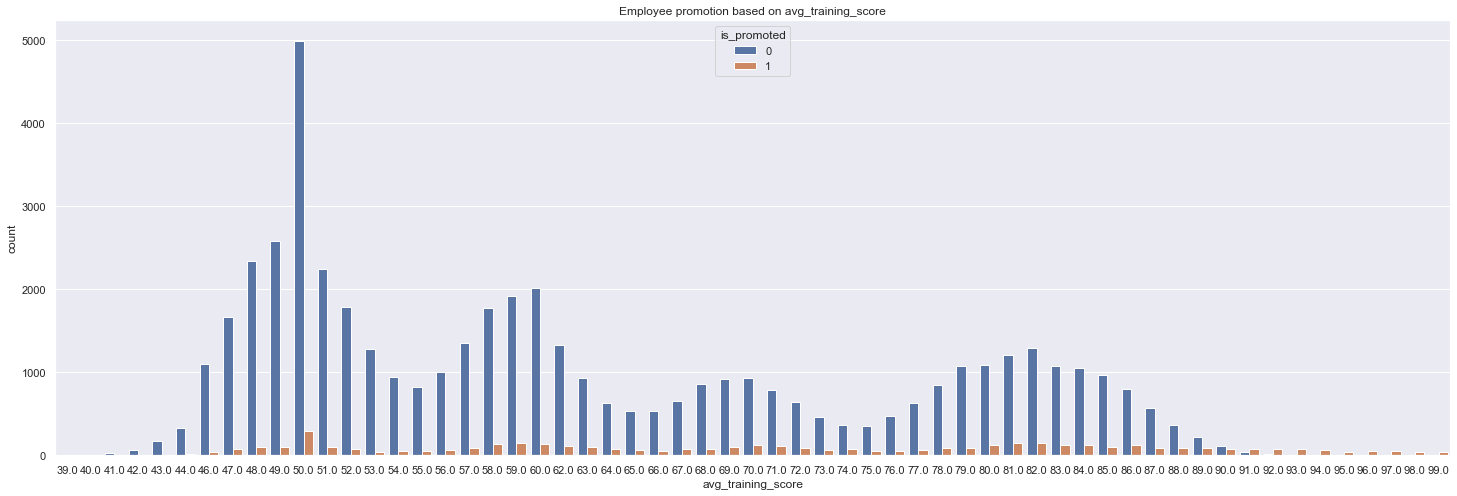

In [41]:
plt.figure(figsize=(25,8))
sns.countplot(x=emp_df['avg_training_score'],hue=emp_df['is_promoted'])
plt.title('Employee promotion based on avg_training_score')
plt.show()

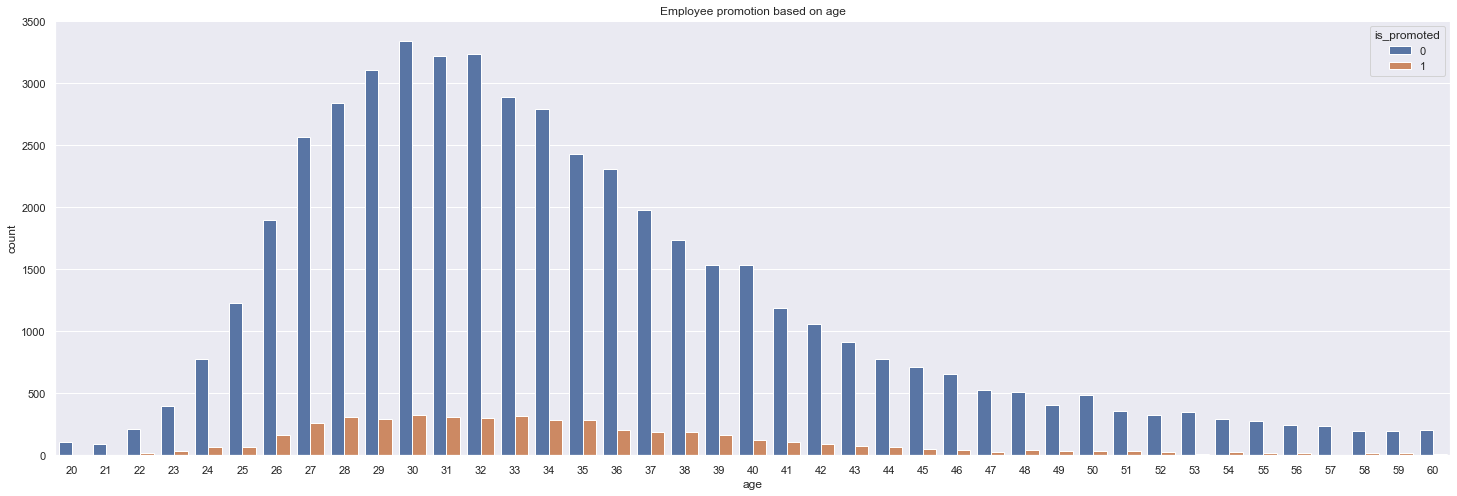

In [42]:
plt.figure(figsize=(25,8))
sns.countplot(x=emp_df['age'],hue=emp_df['is_promoted'])
plt.title('Employee promotion based on age')
plt.show()

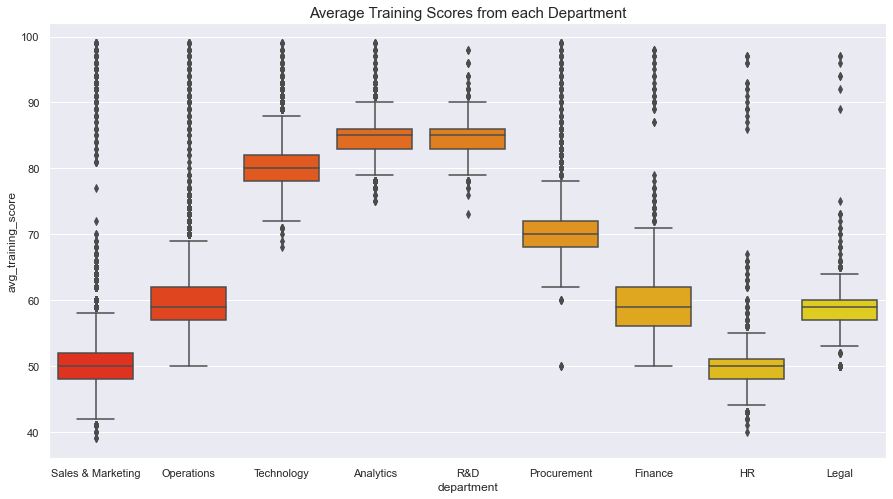

In [43]:
plt.figure(figsize=(15,8))
sns.boxplot(x=emp_df['department'], y=emp_df['avg_training_score'], palette = 'autumn')
plt.title('Average Training Scores from each Department', fontsize = 15)
plt.show()

([<matplotlib.patches.Wedge at 0x21a7505c820>,
 [Text(-0.8627819309079081, -0.6823542626076442, "Bachelor's"),
  Text(0.8933380538118885, 0.6418310693722981, "Master's & above"),
  Text(0.055351594136825596, 1.1987227373444254, 'Below Secondary')])

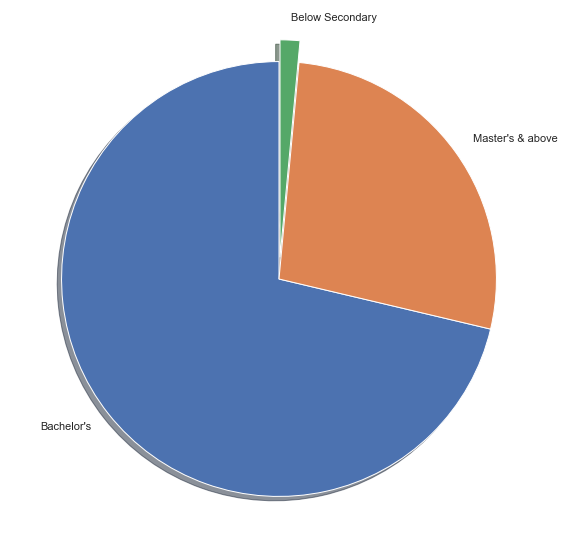

In [44]:
plt.pie(emp_df['education'].value_counts(),
        labels=emp_df['education'].value_counts().index,
        explode = [0,0, 0.1], shadow = True, startangle = 90)

([<matplotlib.patches.Wedge at 0x21a745526d0>,
 [Text(-0.8850610990236698, -0.6531974058391644, 'm'),
  Text(0.8850610990236701, 0.6531974058391639, 'f')])

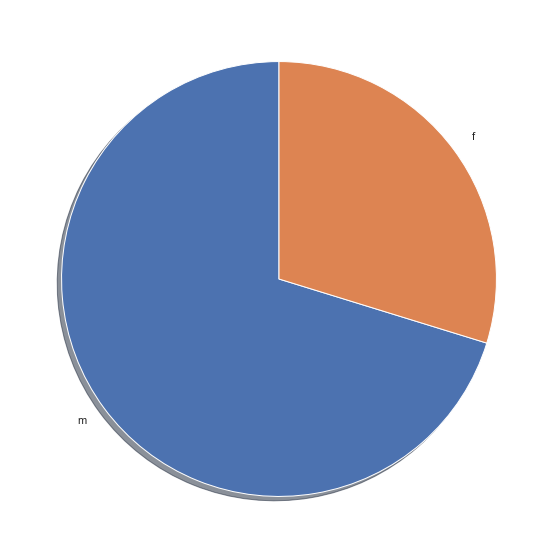

In [45]:
plt.pie(emp_df['gender'].value_counts(),
        labels=emp_df['gender'].value_counts().index,
        explode = [0,0], shadow = True, startangle = 90)

([<matplotlib.patches.Wedge at 0x21a7458ed00>,
 [Text(-1.0833201521076299, -0.1908335610879335, 'other'),
  Text(1.0934829381519948, 0.11956196707348353, 'sourcing'),
  Text(0.07849526285643406, 1.1974299535710218, 'referred')])

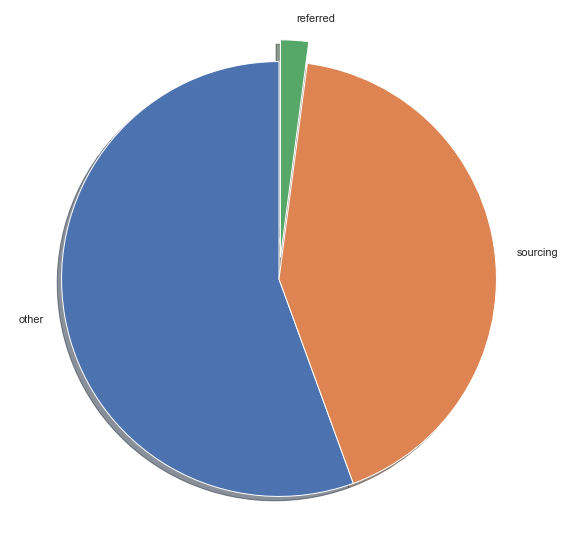

In [46]:
plt.pie(emp_df['recruitment_channel'].value_counts(),
        labels=emp_df['recruitment_channel'].value_counts().index,
        explode = [0,0, 0.1], shadow = True, startangle = 90)

From above pie chart, few employees in secondary education, Female employees are less compare to male. Referred employees are very less. Most
of the employees are recurited either by sourcing or some other method.

#### Multi variate analysis

<AxesSubplot:>

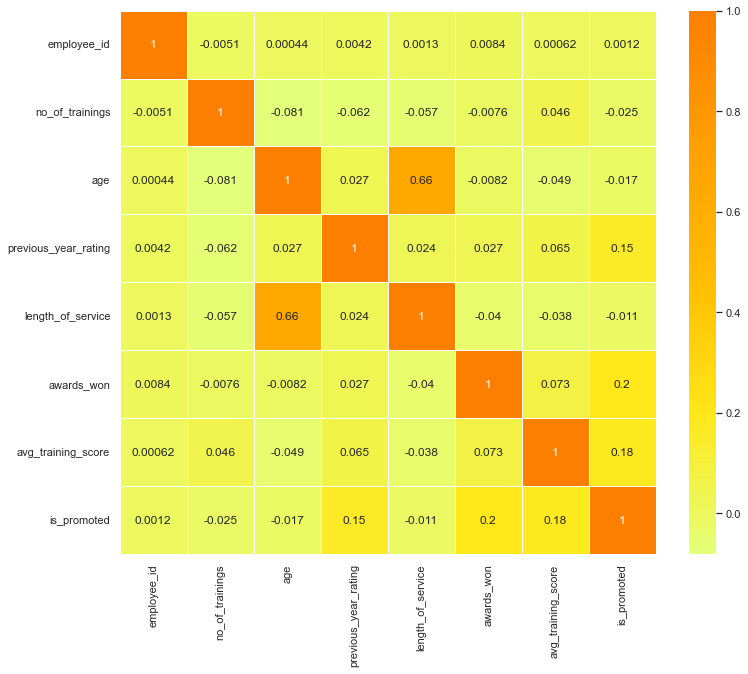

In [47]:
sns.heatmap(emp_df.corr(), cmap = 'Wistia', annot = True, linewidth = 0.5)

Here, we can see some obvious results, that is Length of Service, and Age are Highly Correlated hinting that there is some relation.

<AxesSubplot:xlabel='department', ylabel='avg_training_score'>

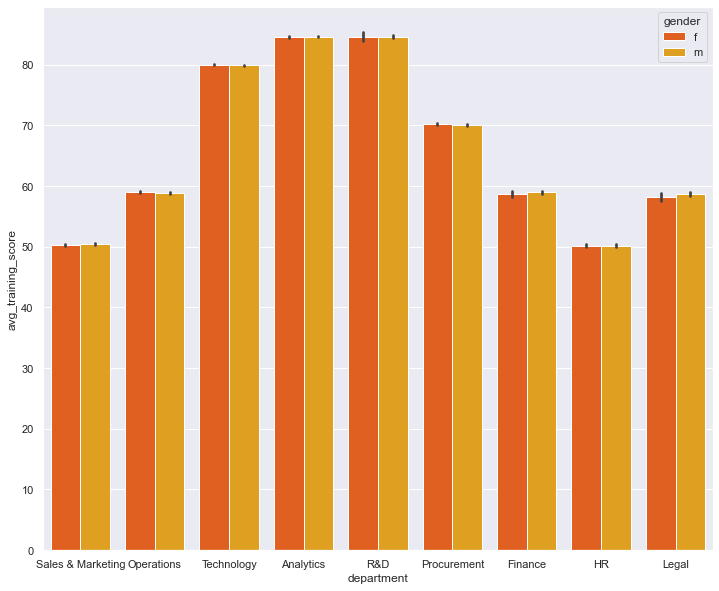

In [48]:
# lets check the relation of Departments and training score

sns.barplot(x=emp_df['department'], y=emp_df['avg_training_score'], hue = emp_df['gender'], palette = 'autumn')

In [49]:
pd.crosstab(emp_df['department'], emp_df['is_promoted'])

is_promoted            0     1
department                    
Analytics           4840   512
Finance             2330   206
HR                  2282   136
Legal                986    53
Operations         10325  1023
Procurement         6450   688
R&D                  930    69
Sales & Marketing  15627  1213
Technology          6370   768

In [50]:
pd.crosstab(emp_df['region'], emp_df['is_promoted'])

is_promoted      0    1
region                 
region_1       552   58
region_10      597   51
region_11     1241   74
region_12      467   33
region_13     2418  230
region_14      765   62
region_15     2586  222
region_16     1363  102
region_17      687  109
region_18       30    1
region_19      821   53
region_2     11354  989
region_20      801   49
region_21      393   18
region_22     5694  734
region_23     1038  137
region_24      490   18
region_25      716  103
region_26     2117  143
region_27     1528  131
region_28     1164  154
region_29      951   43
region_3       309   37
region_30      598   59
region_31     1825  110
region_32      905   40
region_33      259   10
region_34      284    8
region_4      1457  246
region_5       731   35
region_6       658   32
region_7      4327  516
region_8       602   53
region_9       412    8

In [51]:
pd.crosstab(emp_df['recruitment_channel'], emp_df['is_promoted'])

is_promoted              0     1
recruitment_channel             
other                27890  2556
referred              1004   138
sourcing             21246  1974

### Pre processing

In [52]:
# split some data and store as test data for final test case.
train_df=emp_df.sample(frac=0.8,random_state=200) #random state is a seed value 
test_df=emp_df.drop(train_df.index) # 20% of the data

In [53]:
emp_df.shape

(54808, 13)

In [54]:
test_df.shape

(10962, 13)

In [55]:
train_df.shape

(43846, 13)

In [56]:
# Saving test data as csv
test_df.to_csv('data/test.csv')

In [57]:
# Saving train data as csv
train_df.to_csv('data/train.csv')

#### Feature Engineering

It's a process of extract features from raw dataset using doming knowledge. This features further used to improve the machine learning model perfromance.

There are more than one way to perform feature engineering.

* Removing unwanted columns (which doesn't contribute any meaningful insights ex: employee id, region etc.,)
* Extract feature from categorical, numerical features
* Aggregating multiple feature and generate new feature

In [58]:
# Remove some of the columns which doesn't make much impact on predicting promotion of the employee

train_df = train_df.drop(['recruitment_channel', 'employee_id', 'region'], axis=1)

In [59]:
train_df.shape

(43846, 10)

In [60]:
train_df.columns

Index(['department', 'education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'awards_won',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [61]:
# Check some outliers like employee didnot get award, previus year rating as 1 and avg training score is less than 50 and get a promtion
# we need to remove those kind of negative effect data

train_df[(train_df['previous_year_rating'] == 1.0) & 
      (train_df['awards_won'] == 0) & (train_df['avg_training_score'] < 50) & (train_df['is_promoted'] == 1)]

department         education gender  no_of_trainings  age  \
47782  Sales & Marketing  Master's & above      m                1   34   
19582  Sales & Marketing        Bachelor's      m                2   27   
11803  Sales & Marketing        Bachelor's      m                1   42   
17281  Sales & Marketing        Bachelor's      m                1   30   

       previous_year_rating  length_of_service  awards_won  \
47782                   1.0                  7           0   
19582                   1.0                  2           0   
11803                   1.0                 14           0   
17281                   1.0                  4           0   

       avg_training_score  is_promoted  
47782                48.0            1  
19582                46.0            1  
11803                49.0            1  
17281                49.0            1

In [62]:
train_df = train_df.drop(train_df[(train_df['previous_year_rating'] == 1.0) & 
      (train_df['awards_won'] == 0) & (train_df['avg_training_score'] < 50) & (train_df['is_promoted'] == 1)].index)

In [63]:
train_df.shape

(43842, 10)

#### Categorical columns

Categorical columns contain lot's of hidden information which is crucial to develope better model.

* Encode categorical column into numerical column, It's essential because ML models works with numeerical values
* We can use label encoder on department, education, gender to convert categorical into numerical

In [64]:
# Check all the categorical values
train_df.select_dtypes("object").head()

department         education gender
24188  Sales & Marketing        Bachelor's      m
37889          Analytics  Master's & above      m
27652         Operations        Bachelor's      f
15531                 HR        Bachelor's      f
36096         Operations  Master's & above      m

In [65]:
# Encode categorical column into numerical column
from sklearn.preprocessing import LabelEncoder

In [66]:
le = LabelEncoder()

In [67]:
train_df['department'] = le.fit_transform(train_df['department'])
train_df['gender'] = le.fit_transform(train_df['gender'])

In [68]:
# Encode the education in their degree of importance 
train_df['education'] = train_df['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))

In [69]:
train_df.head()

department  education  gender  no_of_trainings  age  \
24188           7          2       1                2   39   
37889           0          3       1                1   34   
27652           4          2       0                1   40   
15531           2          2       0                1   36   
36096           4          3       1                2   43   

       previous_year_rating  length_of_service  awards_won  \
24188                   5.0                  2           0   
37889                   3.0                  8           0   
27652                   2.0                  8           0   
15531                   5.0                  4           0   
36096                   3.0                  3           0   

       avg_training_score  is_promoted  
24188                51.0            0  
37889                82.0            0  
27652                60.0            0  
15531                52.0            1  
36096                59.0            0

After converting categorical into numerical column we can start seperate target and independent columns

* Target variable will be stored on y, and rest of the columns in x (Delete target column)

In [70]:
y = train_df['is_promoted']
X = train_df.drop(["is_promoted"], axis=1)

In [71]:
X.shape

(43842, 9)

In [72]:
y.shape

(43842,)

### Model building without resample the data

In [73]:
# We need to create validation dataset from training data.

from sklearn.model_selection import train_test_split

In [74]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 12)

In [75]:
print("X Train :", x_train.shape)
print("y Train :", y_train.shape)
print("X Val :", x_val.shape)
print("y Val :", y_val.shape)

X Train : (35073, 9)
y Train : (35073,)
X Val : (8769, 9)
y Val : (8769,)


#### Feature scaling

Feature scaling is a method used to normalize the range of independent variables or features of data. it is also known as data normalization.

It's important to scale all the features of the dataset into the same scale

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_val = sc.transform(x_val)

#### Decision Tree Classifier

In [78]:
# Lets use Decision Trees to classify the data
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

Training Accuracy : 0.9890799190260314
Testing Accuracy : 0.8904093967385107


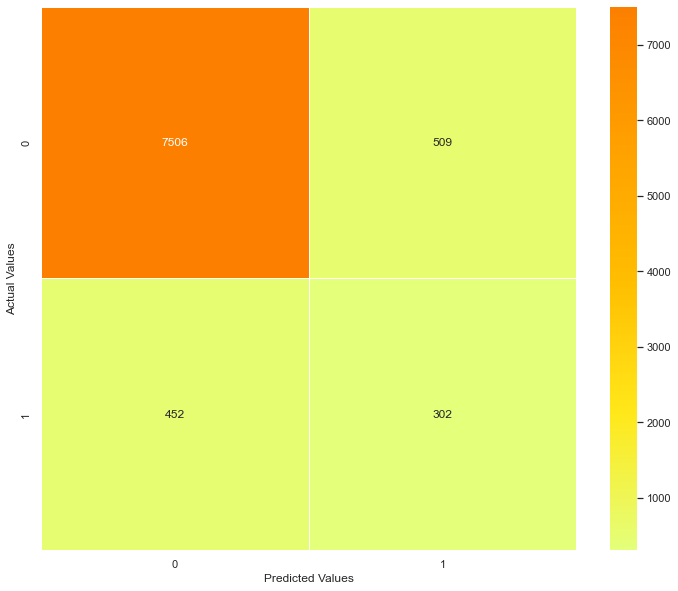

In [79]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_val, y_val))

cm = confusion_matrix(y_val, y_pred)


sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g', linewidth = 0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [80]:
# Looking into Classification Report

cr = classification_report(y_val, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      8015
           1       0.37      0.40      0.39       754

    accuracy                           0.89      8769
   macro avg       0.66      0.67      0.66      8769
weighted avg       0.89      0.89      0.89      8769



Since we didn't resample the data, model looks biased towards the majority target class

#### Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(x_train, y_train)

y_pred = clf.predict(x_val)

Training Accuracy : 0.918512816126365
Testing Accuracy : 0.918918918918919


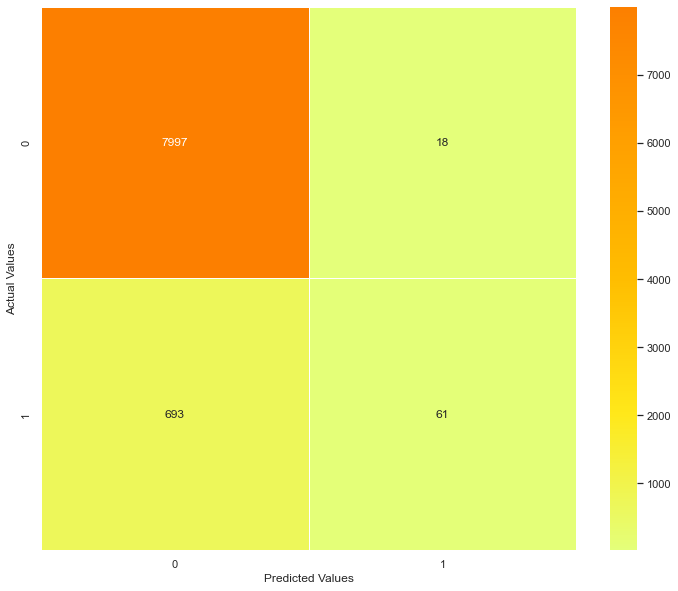

In [82]:
print("Training Accuracy :", clf.score(x_train, y_train))
print("Testing Accuracy :", clf.score(x_val, y_val))

cm = confusion_matrix(y_val, y_pred)


sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g', linewidth = 0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [83]:
cr = classification_report(y_val, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8015
           1       0.77      0.08      0.15       754

    accuracy                           0.92      8769
   macro avg       0.85      0.54      0.55      8769
weighted avg       0.91      0.92      0.89      8769



Same problem happening here aswell, almost everything predicted towards majority class.

#### Bagging classifier

It's a ensample ML algorithm, specially it's ensample of decision tree models. it can be used to combine the prediction of other type of models

In [84]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier

In [85]:
bag_clf = BaggingClassifier()

In [86]:
# Fit the model on the trainng data.
model_res = bag_clf.fit(x_train, y_train)

y_pred = model_res.predict(x_val)

Training Accuracy : 0.9798705556981153
Testing Accuracy : 0.9262173565971035


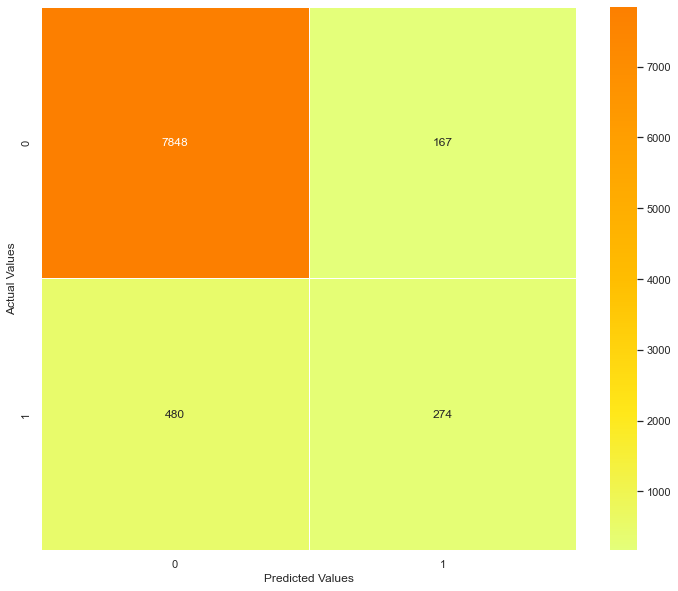

In [87]:
print("Training Accuracy :", bag_clf.score(x_train, y_train))
print("Testing Accuracy :", bag_clf.score(x_val, y_val))

cm = confusion_matrix(y_val, y_pred)


sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g', linewidth = 0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [88]:
cr = classification_report(y_val, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      8015
           1       0.62      0.36      0.46       754

    accuracy                           0.93      8769
   macro avg       0.78      0.67      0.71      8769
weighted avg       0.91      0.93      0.92      8769



Bagging classifier model perfomed litte better compare to logisistic regression. F1 score inceresd on minority class.

#### Gradient Boosing Classifier

Each time we run a decision tree, we extract the residuals. Then we run a new decision tree, using those residuals as the outcome to be predicted. After reaching a stopping point, we add together the predicted values from all of the decision trees to create the final gradient boosted prediction.

Gradient boosting can work on any combination of loss function and model type, as long as we can calculate the derivatives of the loss function with respect to the model parameters. Most often, however, gradient boosting uses decision trees, and minimizes either the residual (regression trees) or the negative log-likelihood (classification trees).

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

In [90]:
learning_rates = [0.1, 0.25, 0.5, 0.75, 1]

In [91]:
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(x_train, y_train)
    y_pred = gb.predict(x_val)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(x_val, y_val)))
    cr = classification_report(y_val, y_pred)
    print(cr)

Learning rate:  0.1
Accuracy score (training): 0.918
Accuracy score (validation): 0.918
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8015
           1       1.00      0.04      0.08       754

    accuracy                           0.92      8769
   macro avg       0.96      0.52      0.52      8769
weighted avg       0.92      0.92      0.88      8769

Learning rate:  0.25
Accuracy score (training): 0.924
Accuracy score (validation): 0.923
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8015
           1       0.88      0.13      0.22       754

    accuracy                           0.92      8769
   macro avg       0.90      0.56      0.59      8769
weighted avg       0.92      0.92      0.90      8769

Learning rate:  0.5
Accuracy score (training): 0.924
Accuracy score (validation): 0.924
              precision    recall  f1-score   support

           0       0.92   

#### Random Forest classifier

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
rf=RandomForestClassifier()

rf.fit(x_train, y_train)

y_pred = rf.predict(x_val)

Training Accuracy : 0.9890228951044964
Testing Accuracy : 0.9269015851294332
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      8015
           1       0.64      0.34      0.45       754

    accuracy                           0.93      8769
   macro avg       0.79      0.66      0.70      8769
weighted avg       0.91      0.93      0.92      8769



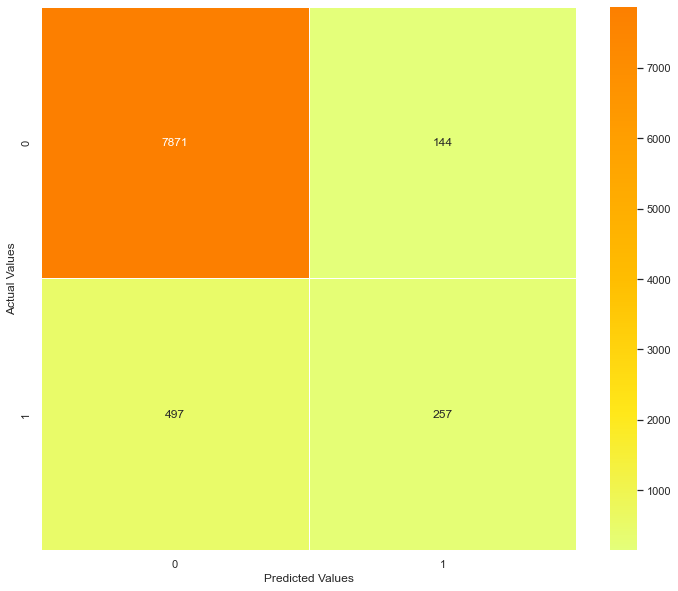

In [94]:
print("Training Accuracy :", rf.score(x_train, y_train))
print("Testing Accuracy :", rf.score(x_val, y_val))

cm = confusion_matrix(y_val, y_pred)
cr = classification_report(y_val, y_pred)
print(cr)

sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g', linewidth = 0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

Random forest also doing better compare to other models.

#### K-Nearest Neighbors classification

In [95]:
from sklearn.neighbors import KNeighborsClassifier

In [96]:
# assigning neighbors as 3
knn = KNeighborsClassifier(10)

knn.fit(x_train,y_train)

y_pred2 = rf.predict(x_val)

Training Accuracy : 0.9261540216120663
Testing Accuracy : 0.924164671000114
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      8015
           1       0.64      0.34      0.45       754

    accuracy                           0.93      8769
   macro avg       0.79      0.66      0.70      8769
weighted avg       0.91      0.93      0.92      8769



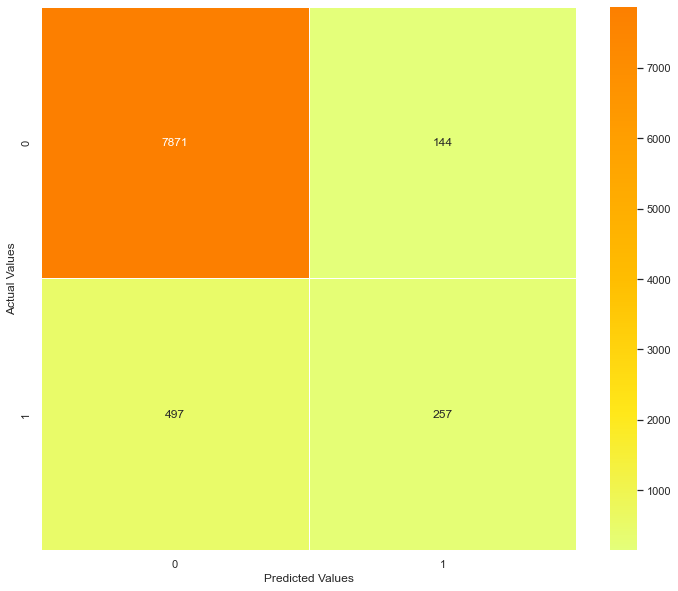

In [97]:
print("Training Accuracy :", knn.score(x_train, y_train))
print("Testing Accuracy :", knn.score(x_val, y_val))

cm = confusion_matrix(y_val, y_pred2)
cr = classification_report(y_val, y_pred2)
print(cr)

sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g', linewidth = 0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

### Resampling

Resampling is the method that consist of draw repeated samples from the originla data samples. Resampling is a non-parametric method of statistical inference

When we do EDA, we noticed the targer column is highly imbalanced, we need to balance the data by using some statistical methods.
Some methods are
* Over sampling
* Cluster based sampling
* Under sampling

Over and under sampling is a method to adjust class distribution of a dataset. 

##### Over sampling

In [98]:
from imblearn.over_sampling import SMOTE

In [101]:
oversample = SMOTE()
x_oversample, y_oversample = oversample.fit_resample(X,y.values.ravel())

In [105]:
print("Before Resampling :")
print(X.shape)
print(y.shape)

Before Resampling :
(43842, 9)
(43842,)


In [106]:
print("After Resampling :")
print(x_oversample.shape)
print(y_oversample.shape)

After Resampling :
(80168, 9)
(80168,)


In [107]:
x_train, x_val, y_train, y_val = train_test_split(x_oversample, y_oversample, test_size = 0.2, random_state = 12)

In [108]:
print("X Train :", x_train.shape)
print("y Train :", y_train.shape)
print("X Val :", x_val.shape)
print("y Val :", y_val.shape)

X Train : (64134, 9)
y Train : (64134,)
X Val : (16034, 9)
y Val : (16034,)


In [109]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_val = sc.transform(x_val)

#### Decision Tree Classifier

In [110]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

Training Accuracy : 0.9867932765771665
Testing Accuracy : 0.9188599226643382
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      7931
           1       0.91      0.93      0.92      8103

    accuracy                           0.92     16034
   macro avg       0.92      0.92      0.92     16034
weighted avg       0.92      0.92      0.92     16034



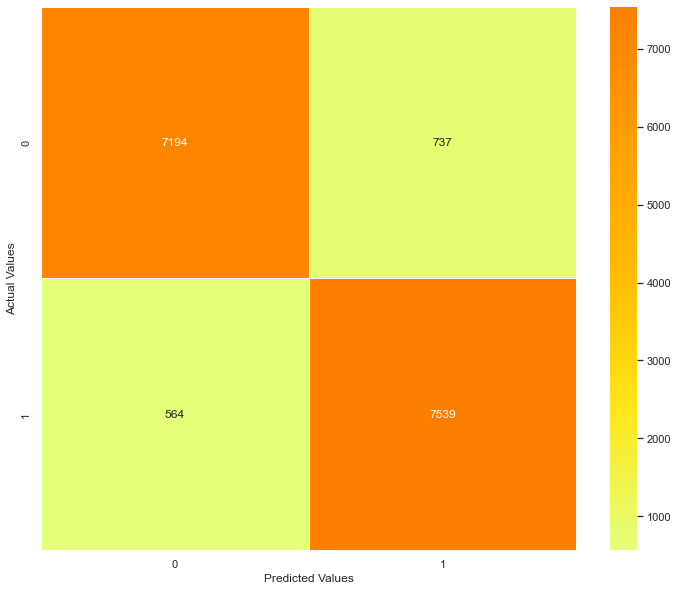

In [111]:
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_val, y_val))

cm = confusion_matrix(y_val, y_pred)

cr = classification_report(y_val, y_pred)
print(cr)


sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g', linewidth = 0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

Results are so much better compare to with out sampled data. F1 Score:0.91 

##### Logistic Regression

In [112]:
clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(x_train, y_train)

y_pred = clf.predict(x_val)

Training Accuracy : 0.6822434278229956
Testing Accuracy : 0.6826743170762131
              precision    recall  f1-score   support

           0       0.68      0.68      0.68      7931
           1       0.69      0.69      0.69      8103

    accuracy                           0.68     16034
   macro avg       0.68      0.68      0.68     16034
weighted avg       0.68      0.68      0.68     16034



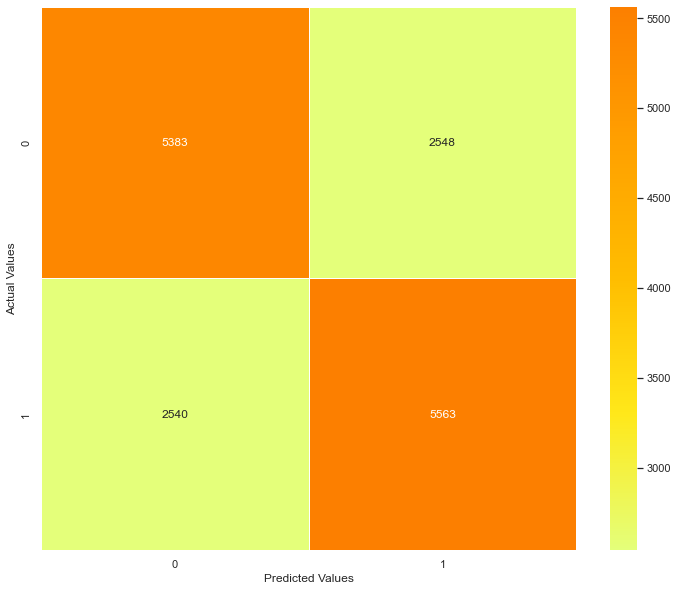

In [113]:
print("Training Accuracy :", clf.score(x_train, y_train))
print("Testing Accuracy :", clf.score(x_val, y_val))

cm = confusion_matrix(y_val, y_pred)

cr = classification_report(y_val, y_pred)
print(cr)


sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g', linewidth = 0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

Even thought over all performence is not great, we can clearly see the balanced result compare to the old data. 

##### Bagging Classifier

In [115]:
bag_clf = BaggingClassifier()

# Fit the model on the trainng data.
bag_clf.fit(x_train, y_train)

y_pred = bag_clf.predict(x_val)

Training Accuracy : 0.9827548570181183
Testing Accuracy : 0.9329549706872895
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      7931
           1       0.94      0.93      0.93      8103

    accuracy                           0.93     16034
   macro avg       0.93      0.93      0.93     16034
weighted avg       0.93      0.93      0.93     16034



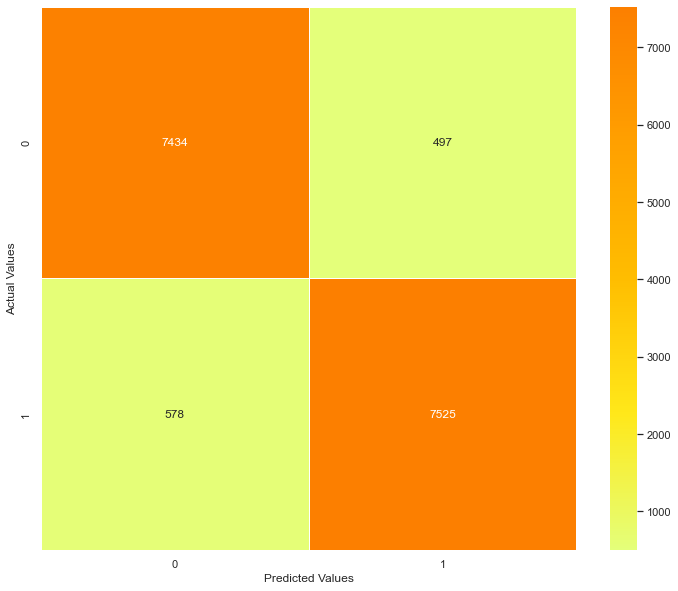

In [116]:
print("Training Accuracy :", bag_clf.score(x_train, y_train))
print("Testing Accuracy :", bag_clf.score(x_val, y_val))

cm = confusion_matrix(y_val, y_pred)
cr = classification_report(y_val, y_pred)
print(cr)

sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g', linewidth = 0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

Results are better than decsion tree with F1 Score of 0.93

##### Gradient Boosing Classifier

In [117]:
learning_rates = [0.1, 0.25, 0.5, 0.75, 1]

In [121]:
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=9, max_depth = 5, random_state = 0)
    gb.fit(x_train, y_train)
    y_pred = gb.predict(x_val)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(x_val, y_val)))
    cr = classification_report(y_val, y_pred)
    print(cr)

Learning rate:  0.1
Accuracy score (training): 0.812
Accuracy score (validation): 0.814
              precision    recall  f1-score   support

           0       0.76      0.91      0.83      7931
           1       0.89      0.73      0.80      8103

    accuracy                           0.81     16034
   macro avg       0.82      0.82      0.81     16034
weighted avg       0.83      0.81      0.81     16034

Learning rate:  0.25
Accuracy score (training): 0.857
Accuracy score (validation): 0.857
              precision    recall  f1-score   support

           0       0.82      0.92      0.86      7931
           1       0.91      0.80      0.85      8103

    accuracy                           0.86     16034
   macro avg       0.86      0.86      0.86     16034
weighted avg       0.86      0.86      0.86     16034

Learning rate:  0.5
Accuracy score (training): 0.884
Accuracy score (validation): 0.882
              precision    recall  f1-score   support

           0       0.84   

When using all the features with max_depth of 5, the results are much better and F1 Score > 0.91

##### Random Forest Classifier

In [122]:

rf=RandomForestClassifier()

rf.fit(x_train, y_train)

y_pred = rf.predict(x_val)

Training Accuracy : 0.9867932765771665
Testing Accuracy : 0.9376325308718972
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7931
           1       0.94      0.94      0.94      8103

    accuracy                           0.94     16034
   macro avg       0.94      0.94      0.94     16034
weighted avg       0.94      0.94      0.94     16034



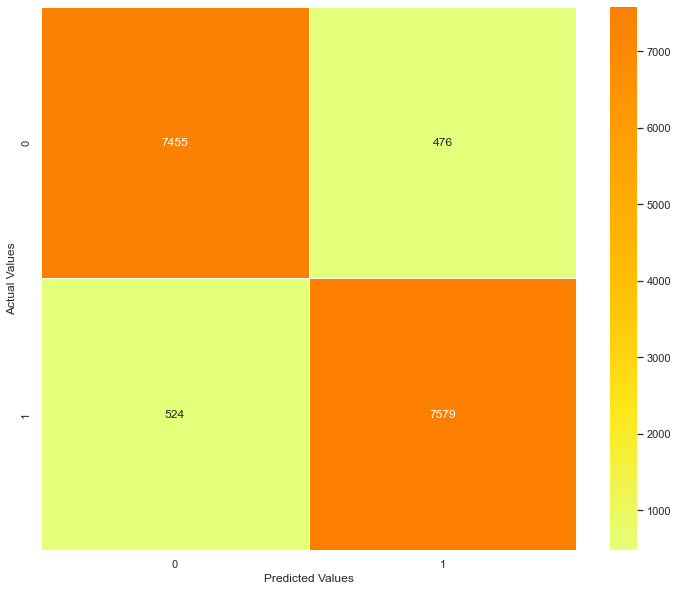

In [123]:
print("Training Accuracy :", rf.score(x_train, y_train))
print("Testing Accuracy :", rf.score(x_val, y_val))

cm = confusion_matrix(y_val, y_pred)
cr = classification_report(y_val, y_pred)
print(cr)

sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g', linewidth = 0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

Random forest out perfomed all other model with F1 score of 0.94

##### K-Nearest Neighbors classification

In [125]:
# assigning neighbors as 3
knn = KNeighborsClassifier(3)

knn.fit(x_train,y_train)

y_pred2 = rf.predict(x_val)

Training Accuracy : 0.9299435556802944
Testing Accuracy : 0.8654110016215542
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7931
           1       0.94      0.94      0.94      8103

    accuracy                           0.94     16034
   macro avg       0.94      0.94      0.94     16034
weighted avg       0.94      0.94      0.94     16034



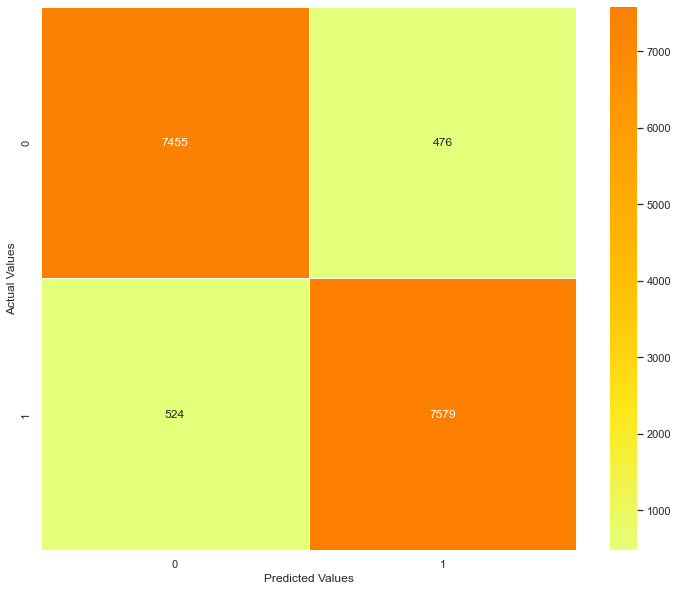

In [126]:
print("Training Accuracy :", knn.score(x_train, y_train))
print("Testing Accuracy :", knn.score(x_val, y_val))

cm = confusion_matrix(y_val, y_pred2)
cr = classification_report(y_val, y_pred2)
print(cr)

sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g', linewidth = 0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

KNN also gave exceptional result on over sampled data with F1 score of 0.94

#### Under sampling

In [128]:
from imblearn.under_sampling import NearMiss

#Class to perform under-sampling based on NearMiss methods.

In [129]:
nm = NearMiss()

In [130]:
X_undersample, y_undersample = nm.fit_resample(X, y)

In [131]:
print("Before Resampling :")
print(X.shape)
print(y.shape)

Before Resampling :
(43842, 9)
(43842,)


In [132]:
print("After Resampling :")
print(X_undersample.shape)
print(y_undersample.shape)

After Resampling :
(7516, 9)
(7516,)


In [133]:
x_train, x_val, y_train, y_val = train_test_split(X_undersample, y_undersample, test_size = 0.2, random_state = 12)

In [134]:
print("X Train :", x_train.shape)
print("y Train :", y_train.shape)
print("X Val :", x_val.shape)
print("y Val :", y_val.shape)

X Train : (6012, 9)
y Train : (6012,)
X Val : (1504, 9)
y Val : (1504,)


In [136]:
# Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_val = sc.transform(x_val)

In [137]:
# Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

Training Accuracy : 0.9411177644710579
Testing Accuracy : 0.7519946808510638
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       755
           1       0.78      0.70      0.74       749

    accuracy                           0.75      1504
   macro avg       0.76      0.75      0.75      1504
weighted avg       0.75      0.75      0.75      1504



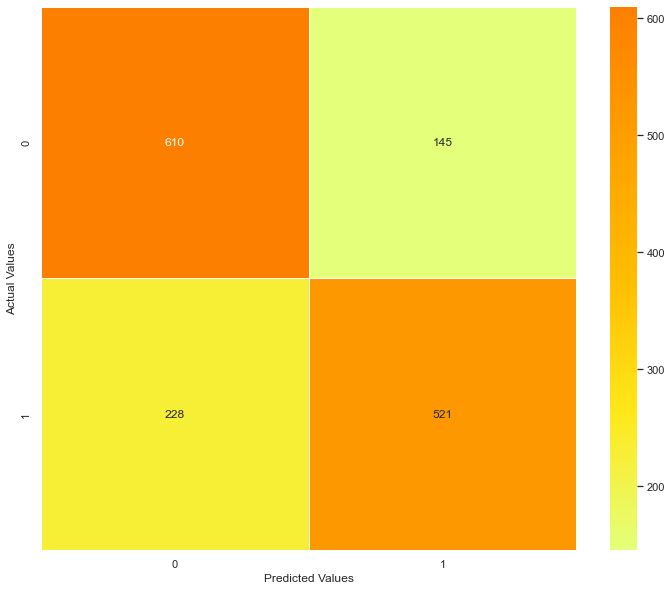

In [138]:
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_val, y_val))

cm = confusion_matrix(y_val, y_pred)

cr = classification_report(y_val, y_pred)
print(cr)


sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g', linewidth = 0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [139]:
# Logistic Regression


clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(x_train, y_train)

y_pred = clf.predict(x_val)

Training Accuracy : 0.7538256819693946
Testing Accuracy : 0.7632978723404256
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       755
           1       0.78      0.73      0.76       749

    accuracy                           0.76      1504
   macro avg       0.76      0.76      0.76      1504
weighted avg       0.76      0.76      0.76      1504



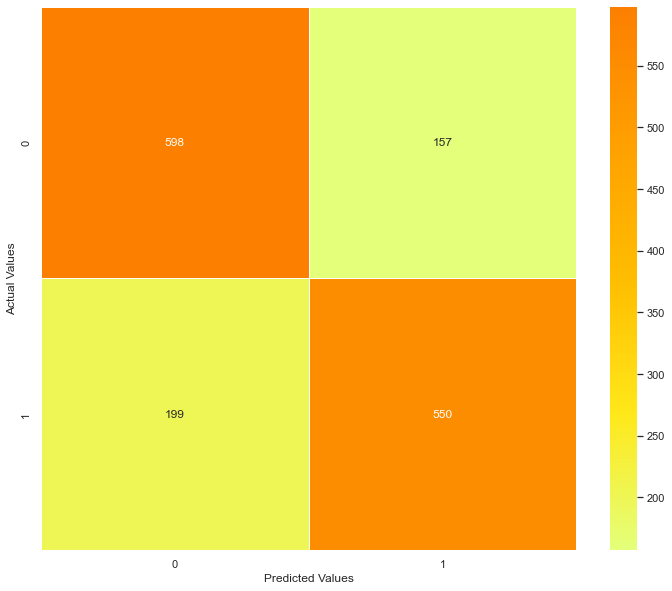

In [140]:
print("Training Accuracy :", clf.score(x_train, y_train))
print("Testing Accuracy :", clf.score(x_val, y_val))

cm = confusion_matrix(y_val, y_pred)

cr = classification_report(y_val, y_pred)
print(cr)


sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g', linewidth = 0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [141]:
#Bagging Classifier
bag_clf = BaggingClassifier()

# Fit the model on the trainng data.
bag_clf.fit(x_train, y_train)

y_pred = bag_clf.predict(x_val)

Training Accuracy : 0.9286427145708582
Testing Accuracy : 0.7652925531914894
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       755
           1       0.79      0.73      0.76       749

    accuracy                           0.77      1504
   macro avg       0.77      0.77      0.76      1504
weighted avg       0.77      0.77      0.76      1504



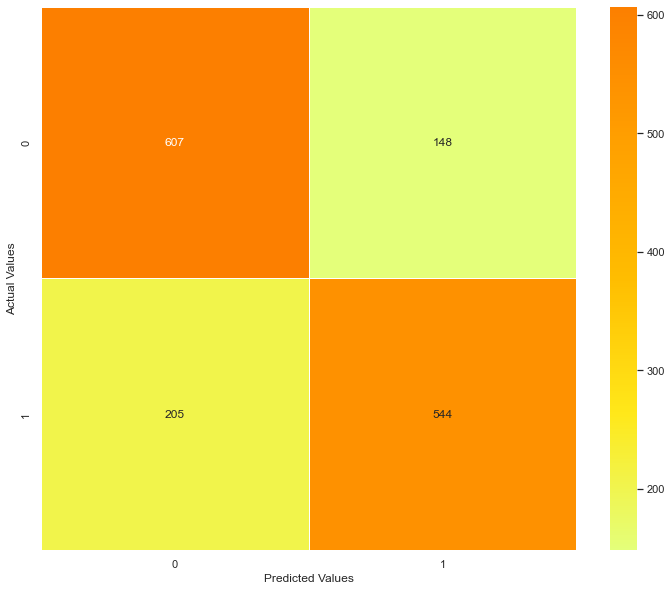

In [142]:
print("Training Accuracy :", bag_clf.score(x_train, y_train))
print("Testing Accuracy :", bag_clf.score(x_val, y_val))

cm = confusion_matrix(y_val, y_pred)
cr = classification_report(y_val, y_pred)
print(cr)

sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g', linewidth = 0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [143]:
# Gradient Boosint classifier
learning_rates = [0.1, 0.25, 0.5, 0.75, 1]

In [144]:
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=9, max_depth = 5, random_state = 0)
    gb.fit(x_train, y_train)
    y_pred = gb.predict(x_val)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(x_val, y_val)))
    cr = classification_report(y_val, y_pred)
    print(cr)

Learning rate:  0.1
Accuracy score (training): 0.822
Accuracy score (validation): 0.811
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       755
           1       0.85      0.75      0.80       749

    accuracy                           0.81      1504
   macro avg       0.82      0.81      0.81      1504
weighted avg       0.82      0.81      0.81      1504

Learning rate:  0.25
Accuracy score (training): 0.849
Accuracy score (validation): 0.826
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       755
           1       0.87      0.77      0.82       749

    accuracy                           0.83      1504
   macro avg       0.83      0.83      0.83      1504
weighted avg       0.83      0.83      0.83      1504

Learning rate:  0.5
Accuracy score (training): 0.865
Accuracy score (validation): 0.834
              precision    recall  f1-score   support

           0       0.80   

In [145]:
# Random forest classifier

rf=RandomForestClassifier()

rf.fit(x_train, y_train)

y_pred = rf.predict(x_val)

Training Accuracy : 0.9411177644710579
Testing Accuracy : 0.7852393617021277
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       755
           1       0.80      0.75      0.78       749

    accuracy                           0.79      1504
   macro avg       0.79      0.79      0.78      1504
weighted avg       0.79      0.79      0.78      1504



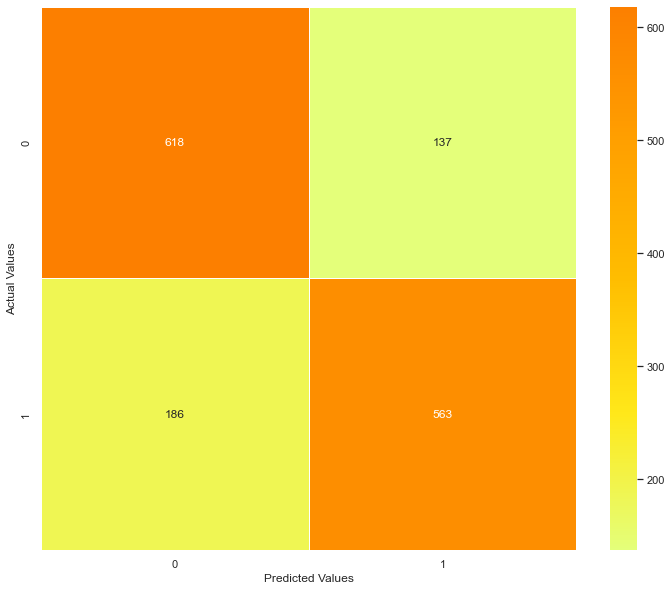

In [146]:
print("Training Accuracy :", rf.score(x_train, y_train))
print("Testing Accuracy :", rf.score(x_val, y_val))

cm = confusion_matrix(y_val, y_pred)
cr = classification_report(y_val, y_pred)
print(cr)

sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g', linewidth = 0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [147]:
# KNN

knn = KNeighborsClassifier(3)

knn.fit(x_train,y_train)

y_pred2 = rf.predict(x_val)

Training Accuracy : 0.8594477711244178
Testing Accuracy : 0.7586436170212766
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       755
           1       0.80      0.75      0.78       749

    accuracy                           0.79      1504
   macro avg       0.79      0.79      0.78      1504
weighted avg       0.79      0.79      0.78      1504



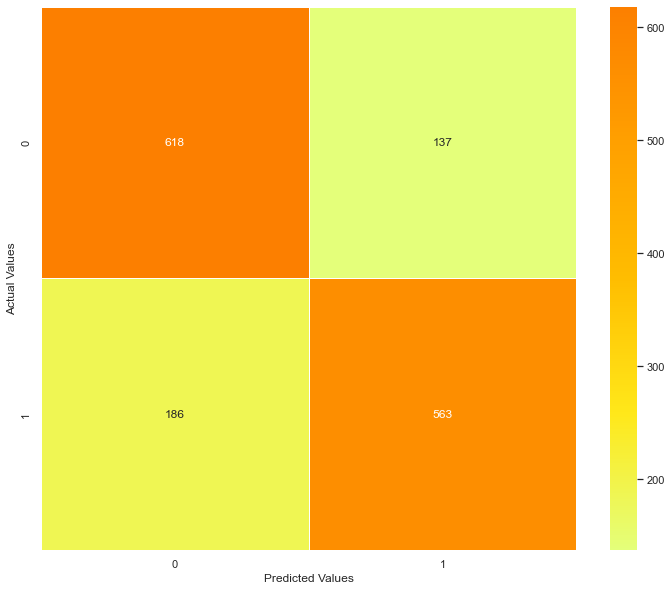

In [148]:
print("Training Accuracy :", knn.score(x_train, y_train))
print("Testing Accuracy :", knn.score(x_val, y_val))

cm = confusion_matrix(y_val, y_pred2)
cr = classification_report(y_val, y_pred2)
print(cr)

sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g', linewidth = 0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# Results

| Classifier  | Normal Data  | Over sampled data  | Under sampled data  |
|---|---|---|---|
| Decision Tree Classifier  | 0.89 (0.94/0.39)  | 0.92 (0.92/0.92) | 0.75 (0.77/0.74)  |
| Logistic Regression  | 0.92 (0.96/0.15)  | 0.68 (0.68/0.69)  | 0.76 (0.77/0.76)  |
| Bagging Classifier  | 0.93 (0.96/0.46)  | 0.93 (0.93/0.93)  | 0.77 (0.77/0.76)  |
| Gradient Boosing Classifier  | 0.92 (0.96/0.24)  | 0.90 (0.91/0.90)  | 0.81 (0.82/0.80)  |
| Random Forest classifier  | 0.93 (0.96/0.45)  | 0.94 (0.94/0.94)  | 0.79 (0.79/0.78)  |
| KNN  | 0.93 (0.96/0.45)  |  0.94 (0.94/0.94)  | 0.79 (0.79/0.78)   |


The table contain F1 Score, (values in the brackets are F1 Score of individual target variable). Normal data we can view there is so much skewness towards majority class, both over sample and under sample don't have much such issue. Random forest and KNN giving almost same results all the time.

From above models lets take 3 models for hyper parameter tuning. The selected models are:

* Random forest classifier (Over sampled data)
* Gradient Boosting algorithm ( under sampled data)
* KNN (Under sampled data)

The ensample version of the decision tree is the Random forest, so didn't choose decision tree classifier.

Gradient boosing algorithm is one of the most effective ML technique. and it provide great result without much fine tuning. This is also based on sci-kit tree implementation.

KNN gave good result on over sampled data, and it's one of the fundamental algorithm in ML. so we would like to fine tune for undersample data to improve model performance.